In [1]:
from __future__ import print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, Flatten, Dropout
# from matplotlib import pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import normalize
import matplotlib
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, AveragePooling1D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn
import numpy as np
import os
CUDA_VISIBLE_DEVICES="1"
# %matplotlib inline

Using TensorFlow backend.


In [2]:
old_data = np.load("./noise_data_aug24/data_01_LPDA_2of4_3sigma_0000.npy")
norm = 1e-6

# first results were from simple2_nonoise

data_name = 'simple2_nonoise'
# data_name = 'simple_nonoise'
# data_name = 'simple_noise'

for i in range(28):
    if i < 10:
        new_data = np.load("./data_feb_23/4LPDA_1dipole_fullband/"+ data_name+"/data_"+data_name+"_000001_LPDA_2of4_100Hz_4LPDA_1dipole_fullband_000"+str(i)+".npy")
        new_labels = np.load("./data_feb_23/4LPDA_1dipole_fullband/labels_000001_LPDA_2of4_100Hz_4LPDA_1dipole_fullband_000"+str(i)+".npy", allow_pickle=True)
    else:
        new_data = np.load("./data_feb_23/4LPDA_1dipole_fullband/"+data_name+"/data_"+data_name+"_000001_LPDA_2of4_100Hz_4LPDA_1dipole_fullband_00"+str(i)+".npy")
        new_labels = np.load("./data_feb_23/4LPDA_1dipole_fullband/labels_000001_LPDA_2of4_100Hz_4LPDA_1dipole_fullband_00"+str(i)+".npy", allow_pickle=True)
    if i==0:
        data = new_data
        labels = new_labels

        shower_energy_had = np.array(labels.item()["shower_energy_had"])
        shower_energy_had = np.log10(shower_energy_had + 1)
        shower_energy_had = shower_energy_had.reshape(shower_energy_had.shape[0], 1)

        idx = ~(np.isnan(data))
        idx = np.all(idx, axis=1)
        data = data[idx, :]
        shower_energy_had = shower_energy_had[idx]
        data = data/norm
        x = data
        y = shower_energy_had
        
    else:
        data = new_data
        labels = new_labels

        shower_energy_had = np.array(labels.item()["shower_energy_had"])
        shower_energy_had = np.log10(shower_energy_had + 1)
        shower_energy_had = shower_energy_had.reshape(shower_energy_had.shape[0], 1)

        idx = ~(np.isnan(data))
        idx = np.all(idx, axis=1)
        data = data[idx, :]
        shower_energy_had = shower_energy_had[idx]
        data = data/norm
        x = np.vstack((x, data))
        y = np.vstack((y, shower_energy_had))

x = np.log10(x+1)
for i in range(x.shape[1]):
    big_min = np.min(x[:,i])
    big_max = np.max(x[:,i])
    x[:,i] -= big_min
    x[:,i] /= (big_max - big_min)

# big_min = np.min(x[:,10:])
# big_max = np.max(x[:,10:])
# x[:,10:] -= big_min
# x[:,10:] /= (big_max - big_min)
# lil_min = np.min(x[:,:10])
# lil_max = np.max(x[:,:10])
# x[:,:10] -= lil_min
# x[:,:10] /= (lil_max - lil_min)

print(old_data.shape)
print(x.shape)
print(y.shape)

(100000, 5, 512)
(2799952, 20)
(2799952, 1)


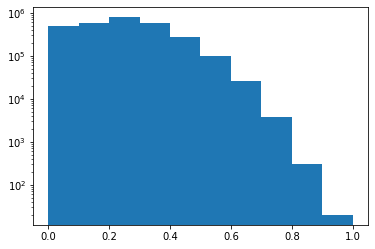

In [3]:
plt.hist(x[:, 9])
plt.yscale('log')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True) 


In [5]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [2]:
# full model 

model = Sequential()
model.add(Conv1D(40, 3, strides=1, padding='valid', activation='relu', input_shape=(20,1)))
model.add(Conv1D(40, 3, strides=1, padding='valid', activation='relu'))

model.add(Conv1D(60, 3, strides=1, padding='valid', activation='relu'))

# model.add(Conv1D(80, 3, strides=1, padding='valid', activation='relu', input_shape=(512, 5)))

# model.add(Conv1D(5, 3, strides=1, padding='valid', activation='relu', input_shape=(512, 5)))
# model.add(Conv1D(5, 3, strides=1, padding='valid', activation='relu', input_shape=(512, 5)))
# model.add(Conv1D(5, 20, strides=1, padding='valid', activation='relu', input_shape=(512,5)))
# model.add(Conv1D(5, 20, strides=1, padding='valid', activation='relu', input_shape=(512,5)))
# model.add(Conv1D(5, 20, strides=1, padding='valid', activation='relu', input_shape=(512,5)))
# model.add(Conv1D(5, 20, strides=1, padding='valid', activation='relu', input_shape=(512,5)))
# model.add(Conv1D(5, 20, strides=1, padding='valid', activation='relu', input_shape=(512,5)))
# model.add(Conv1D(5, 20, strides=1, padding='valid', activation='relu', input_shape=(512,5)))
model.add(Flatten())
# model.add(Dense(5 * 512))
# model.add(Activation('relu'))
# model.add(Dense(5 * 512))
# model.add(Activation('relu'))
# model.add(Dense(4 * 512))
# model.add(Activation('relu'))
# model.add(Dense(1024))
# model.add(Dropout(.2))
# model.add(Activation('relu'))
model.add(Dense(256))
model.add(Dropout(.1))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(.1))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
#               optimizer=Adam(lr=.0001))
              optimizer=Adam())
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 40)            160       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 40)            4840      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 14, 60)            7260      
_________________________________________________________________
flatten_1 (Flatten)          (None, 840)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               215296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_______________________________________

In [6]:
data_name = 'simple2_nonoise'
# data_name = 'simple_nonoise'
# data_name = 'simple_noise'

ck = './'+data_name+'full_model_nov_26.hdf5'
model.load_weights(ck)

In [14]:
model.evaluate(X_test, y_test)


279996/279996 [==============================] - 129s 460us/step


0.02857185247326256

In [15]:
y_pred = model.predict(X_test)

In [16]:
np.max(np.abs(y_pred - y_test))

1.973036516553261

/home/baldig-projects/stephen/skin_superresolution/skin_env2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


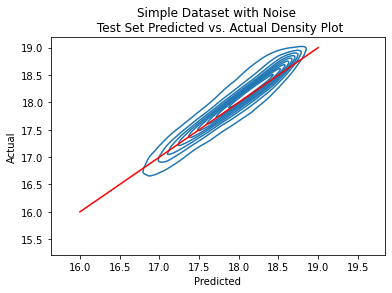

In [17]:
ys_dataframe = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test': y_test.flatten()}, columns=['y_pred', 'y_test'])
seaborn.kdeplot(ys_dataframe.y_pred, ys_dataframe.y_test)
plt.plot([i + 16 for i in range(4)], [i + 16 for i in range(4)], color='red')
plt.title('Simple Dataset with Noise \n Test Set Predicted vs. Actual Density Plot')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0, 0.5, 'actual')

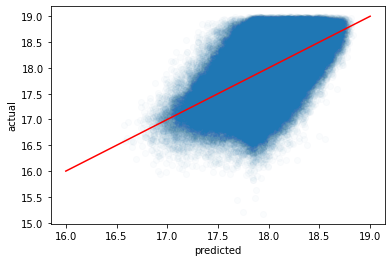

In [57]:
plt.scatter(y_pred, y_test, alpha=.02)
plt.plot([i + 16 for i in range(4)], [i + 16 for i in range(4)], color='red')
plt.xlabel('predicted')
plt.ylabel('actual')

In [58]:
max(y_pred)

array([18.835016], dtype=float32)

Text(0.5, 1.0, 'Simple Dataset with Noise \n Test Set Predicted - Actual Histogram')

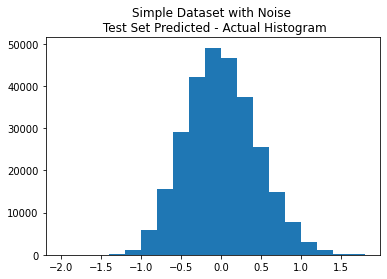

In [59]:
plt.hist(y_pred - y_test, bins = [0.2*x - 2 for x in range(20)])
plt.title('Simple Dataset with Noise \n Test Set Predicted - Actual Histogram')

((array([-4.5668485 , -4.37726081, -4.27445008, ...,  4.27445008,
          4.37726081,  4.5668485 ]),
  array([-1.7343573 , -1.69905008, -1.65141433, ...,  1.77061841,
          1.85536868,  2.43444364])),
 (0.3210772843228503, 0.019386056663746633, 0.9983386891249642))

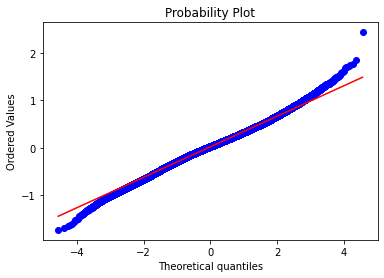

In [72]:
import scipy
scipy.stats.probplot((y_pred - y_test).flatten(), dist="norm", plot=matplotlib.pyplot)

In [73]:
(y_pred - y_test).flatten().shape

(279996,)